In [1]:
import os
import urllib.request

def download_unsplash_photo(photo_id, download_path):
    photo_path = os.path.join(download_path, photo_id + '.jpg') # f'unsplash-dataset/images/{photo_id}.jpg'

    if not os.path.exists(photo_path):
        download_url = f'https://unsplash.com/photos/{photo_id}/download?w=640'
        print(f'Downloading photo from {download_url}')

        try:
            urllib.request.urlretrieve(download_url, photo_path)
        except:
            print(f'Cannot download {photo_id}')
            return None

    return photo_path

In [2]:
def run_yolo(photo_path, result_project, result_name, yolo_path):
    if not photo_path:
        return

    # if os.path.exists(os.path.join(result_project, result_name, os.path.basename(photo_path))):
    #     print(f'Skipping {os.path.basename(photo_path).split(".")[0]}')
    #     return

    print(f'Processing {os.path.basename(photo_path).split(".")[0]}')
    params = [
        '--source', photo_path,
        '--project', result_project,
        '--name', result_name,
        '--exist-ok',
        '--save-txt',
        '--save-conf',
        '--weights', 'yolov5x.pt'
    ]
    args = " ".join(params)

    !python $yolo_path $args #> /dev/null 2> /dev/null

In [3]:
from IPython.display import Image

yolo_path = '/home/vladimir/projects/yolov5/detect.py'
download_path = 'unsplash-dataset/photos/'
result_project = 'unsplash-dataset'
result_name = 'yolo5'

photo_id = '9J4Id8uXcQU'

photo_path = download_unsplash_photo(photo_id, download_path)

if photo_path:
    run_yolo(photo_path, result_project, result_name, yolo_path)
    Image(filename=f'unsplash-dataset/yolo5/{photo_id}.jpg')

Processing 9J4Id8uXcQU
python: can't open file '/home/vladimir/projects/yolov5/detect.py': [Errno 2] No such file or directory


FileNotFoundError: [Errno 2] No such file or directory: 'unsplash-dataset/yolo5/9J4Id8uXcQU.jpg'

In [5]:
import pandas as pd
import time
from multiprocessing import Pool

# Read the photos table
dataset_path = './unsplash-dataset/lite'
photos = pd.read_csv(os.path.join(dataset_path, "photos.tsv000"), sep='\t', header=0)

def process_photo(photo_id):
    photo_path = download_unsplash_photo(photo_id, download_path)
    # run_yolo(photo_path, result_project, result_name, yolo_path)

pool = Pool(32)

photo_ids = list(photos['photo_id'])

pool.map(process_photo, photo_ids)

w=640


Cannot download H80JZAJX7HQ








Cannot download JU5ewSjt8YwCannot download roLUreo8dFkCannot download 7q884uxYVtkCannot download kzlfzjTdOcoCannot download C-oou0-Bu64Cannot download 7J8PXjmhv5oCannot download dfBgZCUp1o4Cannot download yIdimqP4kH4Cannot download sMJnzyC4CNACannot download Y1VHgLgPe34Cannot download 9pJFWW81Z8gCannot download a5kLiYV4ymMCannot download Jaq_YZsxzCcCannot download mFT1uZy4SeU
Cannot download PR8V3-7_rY8Cannot download dYmZqPcd8xA
Cannot download HC2t702jdGoCannot download v9C7j_YG1NsCannot download 0ex5ixoTnRwCannot download 2vHgij_n6q8Cannot download GvSLkDH7XdI

Cannot download fNXSqpC5T9s

Cannot download oms_U53w62A
Cannot download qDG05DPwZSYCannot download UfzifhiEE9U




Cannot download 5adduhZzPso
Cannot download cHuKZSqvKgoCannot download ZwI4S2_7YRcCannot download gj6keK1vMCs
Cannot download WGWvwoZUxXs





















KeyboardInterrupt: 

In [8]:
run_yolo(download_path, result_project, result_name, yolo_path)

vladimir/projects/unsplash-dataset-playground/unsplash-dataset/photos/7WpRtQK5ePE.jpg: 448x640 1 persons, Done. (0.007s)
image 1604/12198 /home/vladimir/projects/unsplash-dataset-playground/unsplash-dataset/photos/7X0PReN_HHY.jpg: 640x448 Done. (0.007s)
image 1605/12198 /home/vladimir/projects/unsplash-dataset-playground/unsplash-dataset/photos/7XDK3bwiANc.jpg: 640x448 Done. (0.007s)
image 1606/12198 /home/vladimir/projects/unsplash-dataset-playground/unsplash-dataset/photos/7XJ3d0xK444.jpg: 640x512 1 cats, Done. (0.007s)
image 1607/12198 /home/vladimir/projects/unsplash-dataset-playground/unsplash-dataset/photos/7XT19IHoXoc.jpg: 640x448 Done. (0.008s)
image 1608/12198 /home/vladimir/projects/unsplash-dataset-playground/unsplash-dataset/photos/7Y0NshQLohk.jpg: 448x640 Done. (0.008s)
image 1609/12198 /home/vladimir/projects/unsplash-dataset-playground/unsplash-dataset/photos/7Y0ZVBWCfNw.jpg: 640x384 1 broccolis, Done. (0.008s)
image 1610/12198 /home/vladimir/projects/unsplash-dataset-pl

In [75]:
import pandas as pd
import glob
import numpy as np
import cv2

labels_dir = 'unsplash-dataset/yolo5/labels'

label_files = glob.glob(os.path.join(labels_dir, '*.txt'))

labels_list = [pd.read_csv(label_file, sep=' ', header=None) for label_file in label_files]
labels_raw = pd.concat(labels_list, axis=0, ignore_index=True)

display(labels_raw)

,0,1,2,3,4,5
0,16,0.613281,0.495316,0.770312,0.990632,0.673340
1,14,0.282031,0.436768,0.173438,0.297424,0.921875
2,21,0.111719,0.435407,0.051562,0.100478,0.274170
3,14,0.111719,0.435407,0.051562,0.100478,0.455322
4,14,0.367188,0.641148,0.178125,0.181818,0.632812
...,...,...,...,...,...,...
31289,6,0.413281,0.548437,0.220313,0.055208,0.456787
31290,58,0.500000,0.523171,0.993750,0.929268,0.397949
31291,26,0.275000,0.832553,0.062500,0.091335,0.374268
31292,35,0.275000,0.832553,0.062500,0.091335,0.678223


In [76]:
target_width = 640
target_height = 480

labels = pd.DataFrame()
labels["class"] = labels_raw[0].copy()
labels["x1"] = (labels_raw[1] - labels_raw[3]/2) * target_width
labels["y1"] = (labels_raw[2] - labels_raw[4]/2) * target_height
labels["x2"] = (labels_raw[1] + labels_raw[3]/2) * target_width
labels["y2"] = (labels_raw[4] + labels_raw[4]/2) * target_height
labels["confidence"] = labels_raw[5].copy()
display(labels)

,class,x1,y1,x2,y2,confidence
0,16,146.00000,0.000000,638.99968,713.255040,0.673340
1,14,124.99968,138.266880,236.00000,214.145280,0.921875
2,21,55.00016,184.880640,88.00016,72.344160,0.274170
3,14,55.00016,184.880640,88.00016,72.344160,0.455322
4,14,178.00032,264.114720,292.00032,130.908960,0.632812
...,...,...,...,...,...,...
31289,6,193.99968,249.999768,335.00000,39.749976,0.456787
31290,58,2.00000,28.097760,638.00000,669.072960,0.397949
31291,26,156.00000,377.705064,196.00000,65.761128,0.374268
31292,35,156.00000,377.705064,196.00000,65.761128,0.678223


In [142]:

def draw_bounding_box(image, coordinates, color=(255,255,255), opacity=0.1):
    box_image = np.zeros(image.shape, np.float32)
    cv2.rectangle(box_image, (coordinates[0], coordinates[1]), (coordinates[2], coordinates[3]), color, cv2.FILLED)
    return cv2.addWeighted(image, 1.0, box_image, opacity, 0)

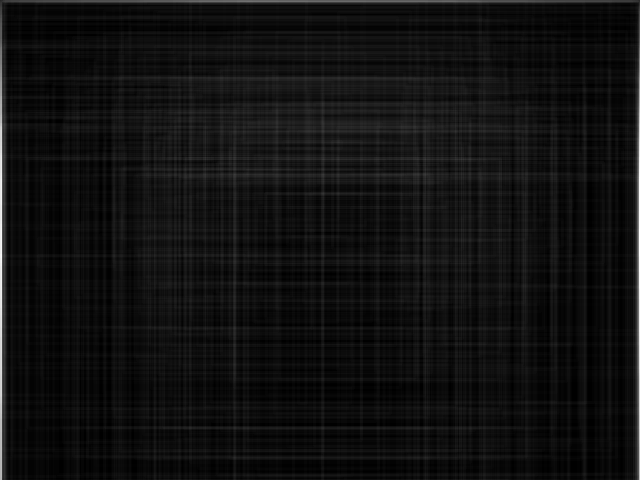

In [145]:
from IPython.display import Image

image = np.zeros((480,640,3), np.float32)

for index, row in labels[labels['class'] == 16].iterrows():
    coordinates = list(np.int32(row[['x1', 'y1', 'x2', 'y2']]))
    image = draw_bounding_box(image, coordinates, (1,1,1), row['confidence'])

image *= 255.0 / np.max(image)

cv2.imwrite("unsplash-dataset/image.png", image)
Image(filename="unsplash-dataset/image.png")

In [123]:
classes = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

for class_id, class_name in enumerate(classes):
    image = np.zeros((480,640,3), np.float32)

    for index, row in labels[labels['class'] == class_id].iterrows():
        coordinates = list(np.int32(row[['x1', 'y1', 'x2', 'y2']]))
        image = draw_bounding_box(image, coordinates, (1,1,1), row['confidence'])

    image *= 255.0 / np.max(image)

    cv2.imwrite(f"unsplash-dataset/visualization/{class_id:02d}_{class_name}.png", image)

In [55]:


for i in range(0, len(classes)):
    print(f'{i:3d}\t{classes[i]}')

  0	person
  1	bicycle
  2	car
  3	motorcycle
  4	airplane
  5	bus
  6	train
  7	truck
  8	boat
  9	traffic light
 10	fire hydrant
 11	stop sign
 12	parking meter
 13	bench
 14	bird
 15	cat
 16	dog
 17	horse
 18	sheep
 19	cow
 20	elephant
 21	bear
 22	zebra
 23	giraffe
 24	backpack
 25	umbrella
 26	handbag
 27	tie
 28	suitcase
 29	frisbee
 30	skis
 31	snowboard
 32	sports ball
 33	kite
 34	baseball bat
 35	baseball glove
 36	skateboard
 37	surfboard
 38	tennis racket
 39	bottle
 40	wine glass
 41	cup
 42	fork
 43	knife
 44	spoon
 45	bowl
 46	banana
 47	apple
 48	sandwich
 49	orange
 50	broccoli
 51	carrot
 52	hot dog
 53	pizza
 54	donut
 55	cake
 56	chair
 57	couch
 58	potted plant
 59	bed
 60	dining table
 61	toilet
 62	tv
 63	laptop
 64	mouse
 65	remote
 66	keyboard
 67	cell phone
 68	microwave
 69	oven
 70	toaster
 71	sink
 72	refrigerator
 73	book
 74	clock
 75	vase
 76	scissors
 77	teddy bear
 78	hair drier
 79	toothbrush
